# CourseWork16 : Building an Intelligent Document Processing System

Intelligent Document Processing (IDP) is an advanced automation technology that transforms the way businesses handle documents. By leveraging artificial intelligence (AI), IDP systems can automatically read, understand, and process vast quantities of documents, extracting crucial data and feeding it into various business workflows. This technology is a significant leap from traditional Optical Character Recognition (OCR) as it not only digitizes text but also comprehends the context and structure of the information within documents.

At its core, IDP is designed to tackle the challenge of processing unstructured and semi-structured data, which make up a large portion of business documents such as invoices, contracts, emails, and forms. By automating the extraction and interpretation of this data, IDP significantly reduces the need for manual data entry, leading to increased efficiency, higher accuracy, and substantial cost savings.

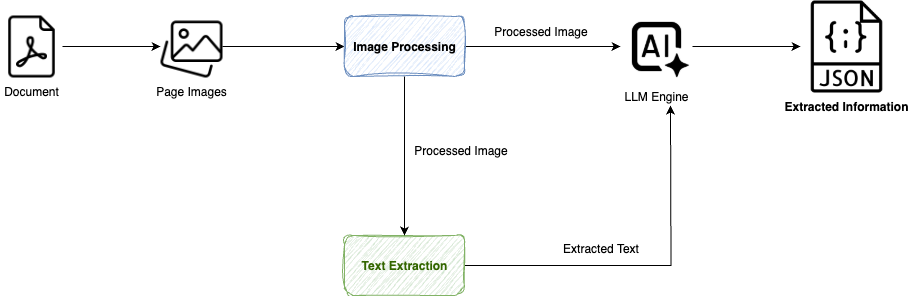

In [1]:
# Dataset - https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset

# 1. Picking 5 resumes from Kaggle Dataset


* Using pdf2Image to convert pdf to img format

In [2]:
%pip install pdf2image Pillow

In [3]:
%pip install pdf2image Pillow

In [4]:
import os

expected_files = [
    '/content/Banking_11637468.pdf',
    '/content/Aviation_technician_10176815.pdf',
    '/content/Finance_Manager_11490673.pdf',
    '/content/Automobile_Principal_11152490.pdf',
    '/content/Accountant_10554236.pdf'
]

## Convert pdf to jpg



In [6]:
from pdf2image import convert_from_path
import os

converted_images = []

for pdf_path in expected_files:
    try:
        images = convert_from_path(pdf_path)
        converted_images.extend(images)
        print(f"Converted {pdf_path} to {len(images)} images.")
    except Exception as e:
        print(f"Error converting {pdf_path}: {e}")

print(f"Total images converted: {len(converted_images)}")

Error converting /content/Banking_11637468.pdf: Unable to get page count. Is poppler installed and in PATH?
Error converting /content/Aviation_technician_10176815.pdf: Unable to get page count. Is poppler installed and in PATH?
Error converting /content/Finance_Manager_11490673.pdf: Unable to get page count. Is poppler installed and in PATH?
Error converting /content/Automobile_Principal_11152490.pdf: Unable to get page count. Is poppler installed and in PATH?
Error converting /content/Accountant_10554236.pdf: Unable to get page count. Is poppler installed and in PATH?
Total images converted: 0


#Insight:

Poppler is used by pdf2image extraction, hence needed this.



In [7]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.10 [186 kB]
Fetched 186 kB in 1s (221 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126441 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.10_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.10) ...
Setting up poppler-utils (22.02.0-2ubuntu0.10) ...
Processing triggers for man-db (2.10.2-1) ...


In [13]:
from pdf2image import convert_from_path
import os

converted_images = []
output_dir = "/content/converted_resume_images"
os.makedirs(output_dir, exist_ok=True)

for pdf_path in expected_files:
    try:
        images = convert_from_path(pdf_path)
        converted_images.extend(images)
        print(f"Converted {pdf_path} to {len(images)} images.")

        # Save the converted images with names based on the original PDF filename
        base_filename = os.path.splitext(os.path.basename(pdf_path))[0]
        for i, image in enumerate(images):
            image_path = os.path.join(output_dir, f"{base_filename}_page{i+1}.jpg")
            image.save(image_path, 'JPEG')
            print(f"Saved image to {image_path}")

    except Exception as e:
        print(f"Error converting {pdf_path}: {e}")

print(f"Total images converted: {len(converted_images)}")

Converted /content/Banking_11637468.pdf to 2 images.
Saved image to /content/converted_resume_images/Banking_11637468_page1.jpg
Saved image to /content/converted_resume_images/Banking_11637468_page2.jpg
Converted /content/Aviation_technician_10176815.pdf to 2 images.
Saved image to /content/converted_resume_images/Aviation_technician_10176815_page1.jpg
Saved image to /content/converted_resume_images/Aviation_technician_10176815_page2.jpg
Converted /content/Finance_Manager_11490673.pdf to 2 images.
Saved image to /content/converted_resume_images/Finance_Manager_11490673_page1.jpg
Saved image to /content/converted_resume_images/Finance_Manager_11490673_page2.jpg
Converted /content/Automobile_Principal_11152490.pdf to 3 images.
Saved image to /content/converted_resume_images/Automobile_Principal_11152490_page1.jpg
Saved image to /content/converted_resume_images/Automobile_Principal_11152490_page2.jpg
Saved image to /content/converted_resume_images/Automobile_Principal_11152490_page3.jpg
C

**Reasoning**:
Display the first few converted JPG images to verify the conversion.



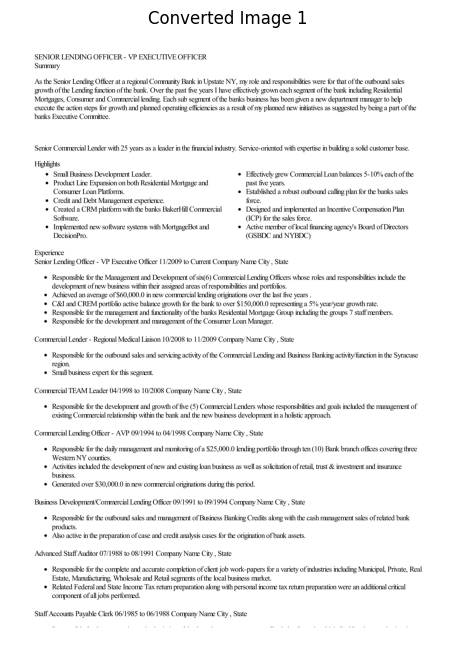

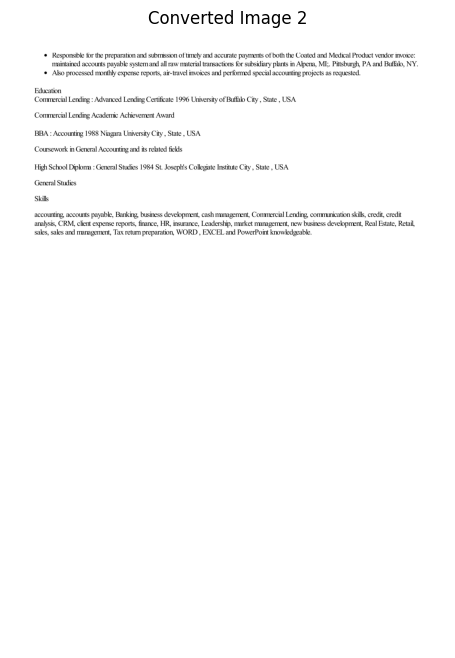

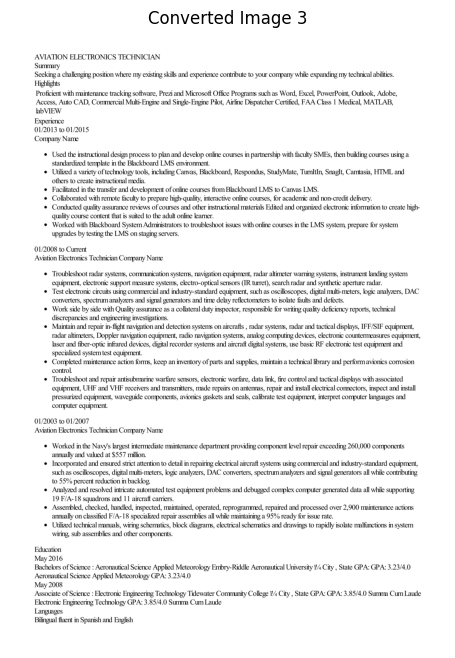

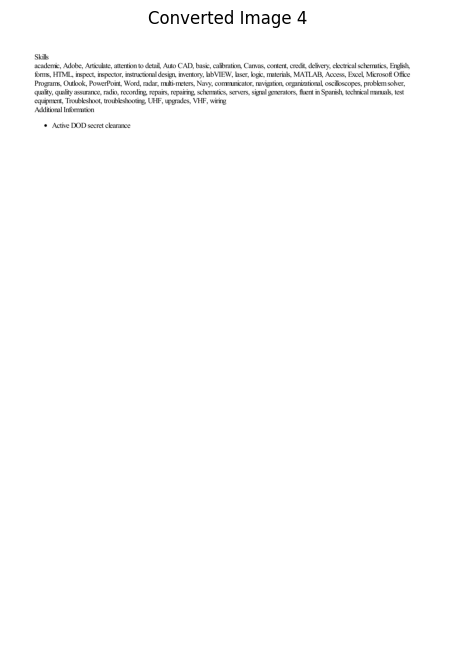

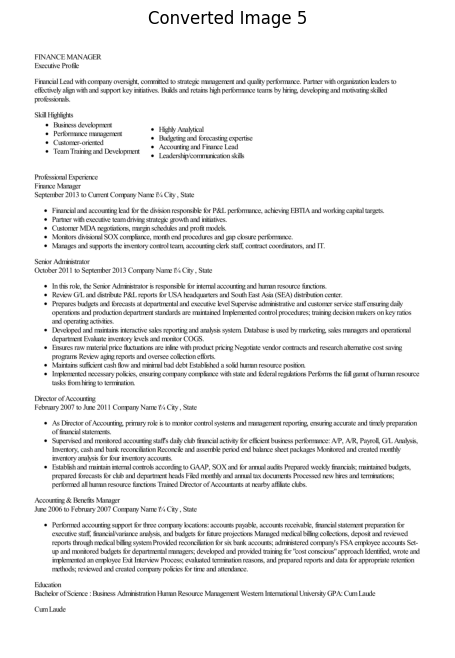

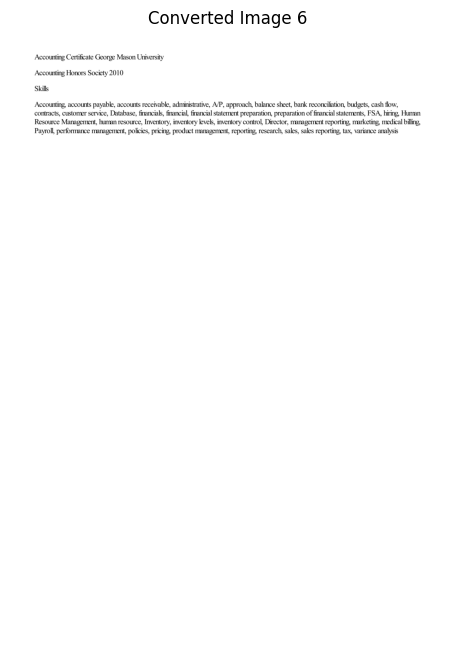

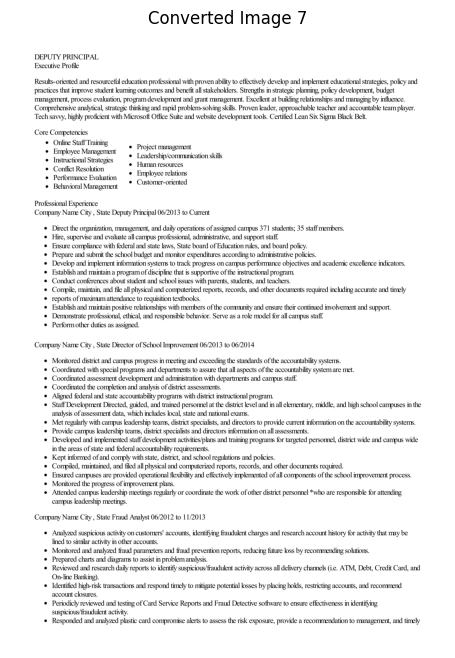

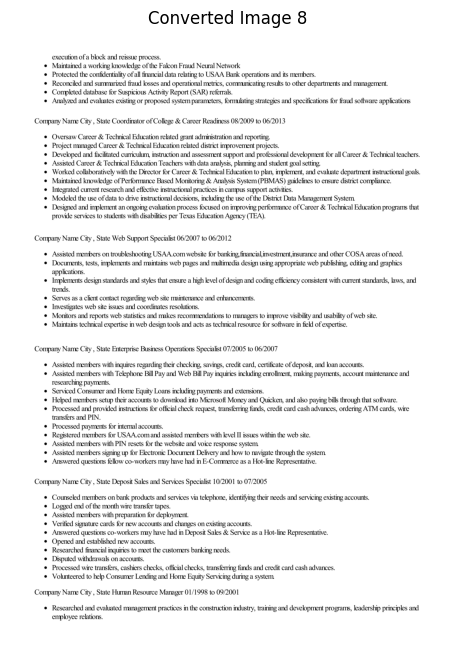

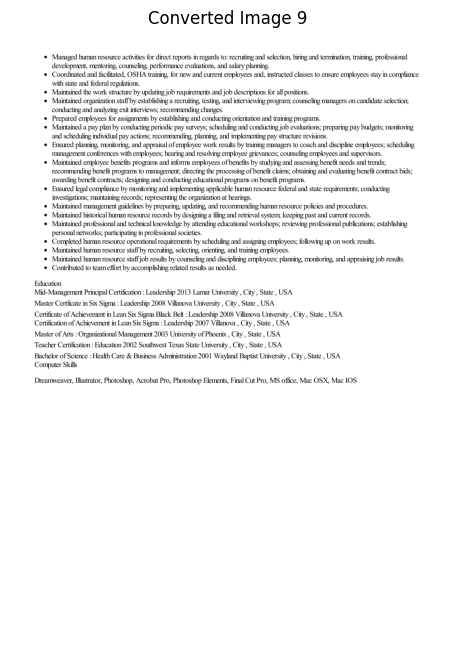

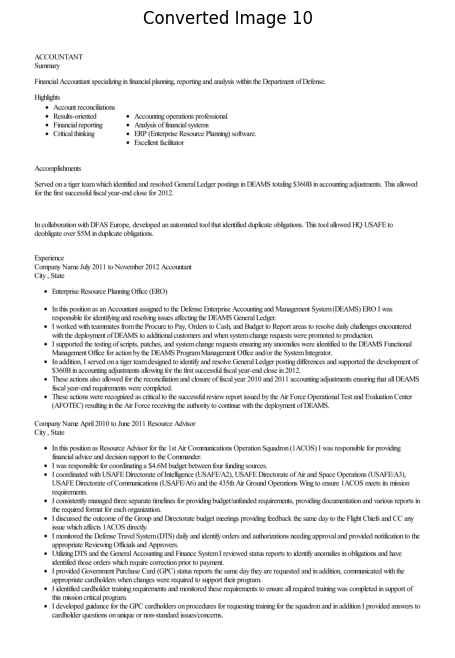

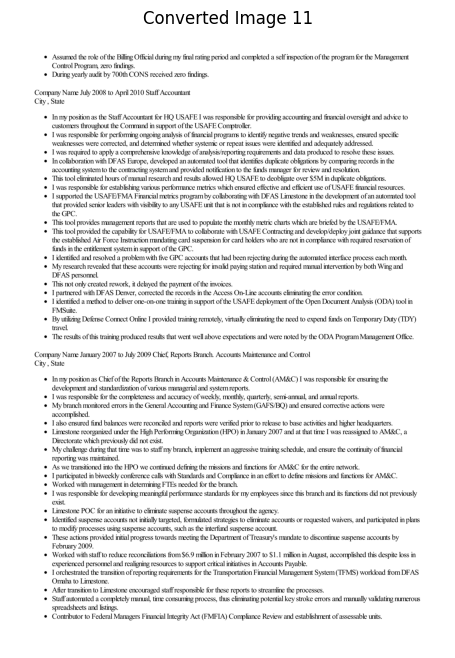

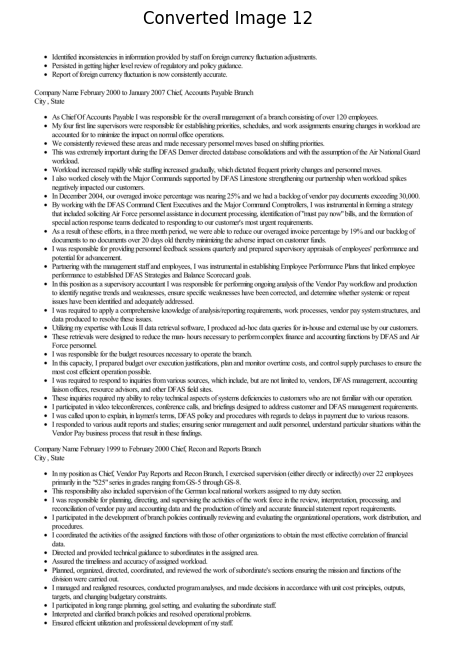

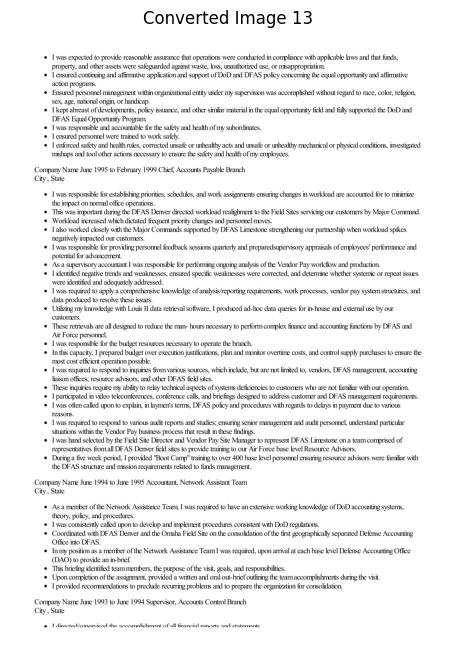

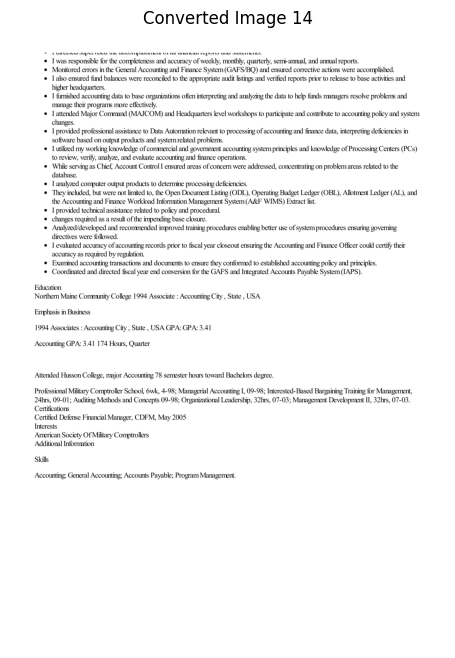

In [14]:
import matplotlib.pyplot as plt

num_images_to_display = len(converted_images)

for i in range(num_images_to_display):
    plt.figure(figsize=(8, 8))
    plt.imshow(converted_images[i])
    plt.title(f"Converted Image {i+1}")
    plt.axis('off')
    plt.show()

## Image Preprocesing: OpenCV

In [15]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

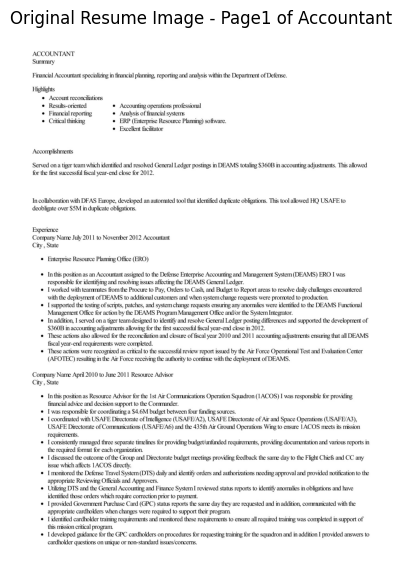

In [16]:
one_image = cv2.imread('/content/converted_resume_images/Accountant_10554236_page1.jpg')
display_image(one_image, "Original Resume Image - Page1 of Accountant")

# Grayscale Conversion
Color information is usually not necessary for reading the text on a receipt. Converting the image to grayscale simplifies it from three color channels (Red, Green, Blue) to a single channel (intensity/brightness). This reduces computational complexity and is a required first step for many subsequent operations like thresholding.

**However Image is by default in grayscale format** But lets include it if some are colored

In [17]:
# Convert the image to grayscale
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

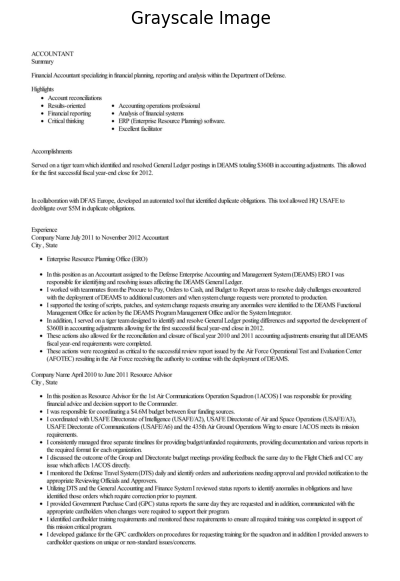

In [18]:
grayscale_image = convert_to_grayscale(one_image)
display_image(grayscale_image, "Grayscale Image")

### Noise (blur) Reduction

* Scanned images or photos often contain "noise" (random variations in brightness or color). This can look like small specks or graininess, which can confuse OCR algorithms. Applying a slight blur helps to smooth out this noise.

* A **Gaussian blur** is a common choice as it effectively averages out pixel values with a weighted average, preserving edges better than a simple blur.

In [19]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

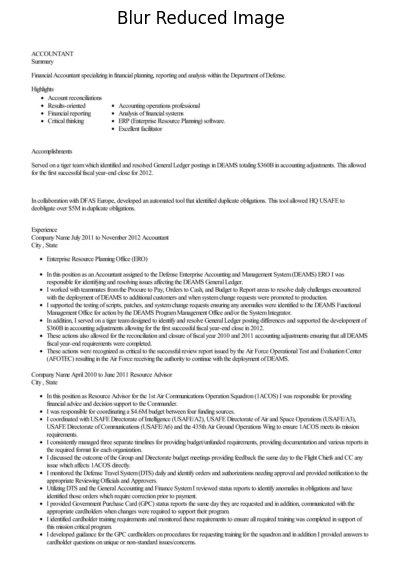

In [20]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

### Binarization (Thresholding)

**Why?** This is one of the most critical steps. Binarization converts the grayscale image into a pure black-and-white image. The goal is to make the text **black** and the background **white**. However, receipts often have uneven lighting or shadows, so a simple (global) threshold won't work well. We use **adaptive thresholding**, which calculates a different threshold for smaller regions of the image, making it robust to lighting changes.

In [21]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, # Invert the colors (text becomes white)
    11, # Block size
    4  # Constant C
  )

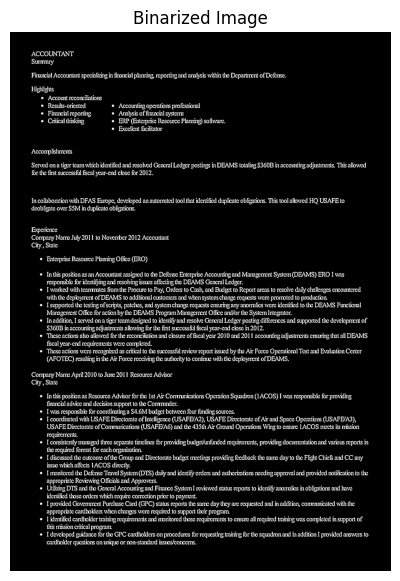

In [22]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

### Skew Correction

**Why?** Receipts are often scanned or photographed at a slight angle. This skew can significantly reduce the accuracy of OCR. We need to detect this angle and rotate the image to make the text perfectly horizontal.

A common technique is to find the angle of the minimum-area bounding box that encloses all the text (the white pixels in our binarized image) and then rotate the original image by that angle.

In [23]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [24]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: -0.42 degrees


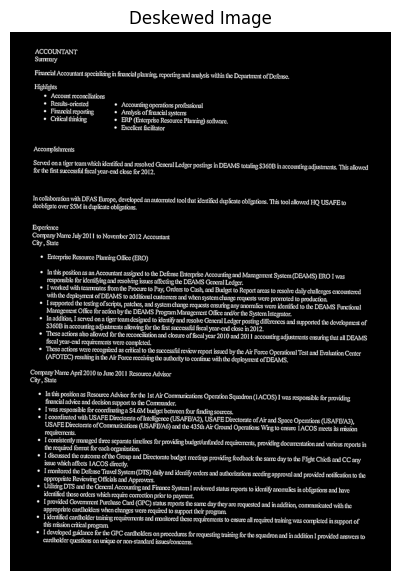

In [25]:
display_image(deskewed_image, "Deskewed Image")

In [26]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  print("Converted image to grayscale..")
  image = reduce_noise(image)
  print("Reduced noise in the image..")
  image = binarize_image(image)
  print("Binarized the image..")
  image = deskew_image(image)
  print("Corrected image orientation..")
  return image

# Lets do it for all the 5 resumes

In [27]:
import os
import cv2

input_dir = "/content/converted_resume_images"
output_dir = "/content/processed_images"
os.makedirs(output_dir, exist_ok=True)

image_files = [f for f in os.listdir(input_dir) if f.endswith('.jpg')]

for image_file in image_files:
    image_path = os.path.join(input_dir, image_file)
    image = cv2.imread(image_path)

    if image is not None:
        print(f"Processing {image_file}...")
        processed_image = process_one_image(image)

        output_path = os.path.join(output_dir, f"processed_{image_file}")
        cv2.imwrite(output_path, processed_image)
        print(f"Saved processed image to {output_path}")
    else:
        print(f"Error loading image: {image_file}")

print("Finished processing all images.")

Processing Accountant_10554236_page3.jpg...
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to /content/processed_images/processed_Accountant_10554236_page3.jpg
Processing Finance_Manager_11490673_page2.jpg...
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: -0.00 degrees
Corrected image orientation..
Saved processed image to /content/processed_images/processed_Finance_Manager_11490673_page2.jpg
Processing Automobile_Principal_11152490_page3.jpg...
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to /content/processed_images/processed_Automobile_Principal_11152490_page3.jpg
Processing Aviation_technician_10176815_page1.jpg...
Converted image to grayscale..
Reduced noise in the image..
Binarized the

# Using Tesseract - Extract the texts

Tesseract OCR is a powerful and widely-used open-source optical character recognition (OCR) engine. In simple terms, it's a software that can "read" text from images and convert it into machine-readable text. This means you can take a picture of a document, a sign, or any other object containing text, and Tesseract can extract that text so you can edit, search, or analyze it.

In [28]:
! pip install pytesseract pillow

In [29]:
from PIL import Image
import pytesseract

pytesseract.image_to_string(Image.open('/content/processed_images/processed_Accountant_10554236_page1.jpg'))

'ACCOUNTANT\nASTirn cesta\n\nFinancial Accountant specializing in financial planning, reporting and analysis within the Department of Defense.\n\nHighlights\n¢ Account reconciliations\n© Results-oriented © Accounting operations professional\n¢ Financial reporting Crest siictnersl esa arts\n* Critical thinking ¢ ERP (Enterprise Resource Planning) software.\n© Excellent facilitator\nAccomplishments\n\nServed ona tiger team which identified and resolved General ead RULE DOW ARMIN sb ab ecan unset tourer cms oe atte]\nfor the first successfil fiscal year-end close for 2012.\n\nLACED OWE Crm erence CTE ent ee] duplicate obligations. This tool allowed HQ USAFE to\nCCl Ramm Vetsn sled neliedt ee\n\nExperience\nCompany Name July 2011 to Novernber 2012 Accountant\nOANA\n\nEnterprise Resource Planning Office (ERO)\n\nORS eS he BeEUvatcen tenes cc neck Ml cys ano Enterprise Accounting and Management System (DEAMS) ERO I was\nresponsible for identifying and resolving issues affecting the DEAMS Gen

In [30]:
from PIL import Image
import pytesseract
import time

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

total_images = sum(1 for entry in os.scandir(input_folder_path))
print(f"Total images in folder: {total_images}")

for i, image_name in enumerate(os.listdir(input_folder_path)[:20], 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(input_folder_path, image_name)
  print("Extracting text from image..")
  text = pytesseract.image_to_string(Image.open(image_path))
  output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".txt"))
  with open(output_path, "w") as f:
    f.write(text)

  print(f"Saved extracted text to {output_path}")
  print("-"*50)

print("Text Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total images in folder: 14
Processing image 1/14: processed_Aviation_technician_10176815_page1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/processed_Aviation_technician_10176815_page1.txt
--------------------------------------------------
Processing image 2/14: processed_Automobile_Principal_11152490_page1.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/processed_Automobile_Principal_11152490_page1.txt
--------------------------------------------------
Processing image 3/14: processed_Banking_11637468_page2.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/processed_Banking_11637468_page2.txt
--------------------------------------------------
Processing image 4/14: processed_Automobile_Principal_11152490_page3.jpg
Extracting text from image..
Saved extracted text to /content/tesseract_output/processed_Automobile_Principal_11152490_page3.txt
----------------------------------------

In [31]:
prompt = """
Extract the information from the given image.
Information to be extracted: company, summary, experience, skills.
The image has been converted to grayscale, noise reduced, binarized, and deskewed using opencv.
Always give your response in the following format:
{
    "summary": "profile_summary",
    "company": "company_name",
    "experience": "experiences in his past roles",
    "skills": "skills",
}
Also, the text has been extracted from the image using tesseract.
Use the extracted text as support for extracting information.
If you believe the extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified format.
Here is the text:
"""

In [32]:
from google import genai
from google.colab import userdata # colab only code
from PIL import Image
import json
import time

In [33]:
genai_client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

In [34]:
image_folder_path = "/content/processed_images"
text_folder_path = "/content/tesseract_output"
output_folder_path = "/content/json_output"

start_time = time.time()

if os.makedirs(output_folder_path, exist_ok=True):
  print(f"Created folder: {output_folder_path}")

# Filter image files to include only the first page of each resume
image_files_page1 = [f for f in os.listdir(image_folder_path) if f.endswith('_page1.jpg')]
total_images = len(image_files_page1)
print(f"Total first page images found: {total_images}")

for i, image_name in enumerate(image_files_page1, 1):
  print(f"Processing image {i}/{total_images}: {image_name}")
  image_path = os.path.join(image_folder_path, image_name)
  print(f"Loading image: {image_path}")
  try:
    with open(image_path, "rb") as f:
      image = Image.open(image_path)
  except Exception as e:
    print(f"Error loading image {image_path}: {e}")
    continue


  text_path = os.path.join(text_folder_path, image_name.replace(".jpg", ".txt"))
  print(f"Loading extracted text: {text_path}")
  try:
    with open(text_path, "r") as f:
      text = f.read()
  except Exception as e:
    print(f"Error loading text file {text_path}: {e}")
    continue


  print("Extracting information from image and text..")

  current_prompt = prompt + text # Use a new variable for the prompt in each iteration


  contents = [
        image,
        {
            "text": current_prompt
        }
    ]

  try:
    response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)

    if response.text is None:
        print(f"Model returned no text for image {image_name}. Skipping.")
        continue

    # Access the usage_metadata attribute
    usage_metadata = response.usage_metadata

    # Print the different token counts
    if usage_metadata:
        print(f"Input Token Count: {usage_metadata.prompt_token_count}")
        print(f"Thoughts Token Count: {usage_metadata.thoughts_token_count}")
        print(f"Output Token Count: {usage_metadata.candidates_token_count}")
        print(f"Total Token Count: {usage_metadata.total_token_count}")
    else:
        print("Usage metadata not available.")


    extracted_information = json.loads(response.text.replace('```json', '').replace('```', ''))
    output_path = os.path.join(output_folder_path, image_name.replace(".jpg", ".json"))
    with open(output_path, "w") as f:
      json.dump(extracted_information, f, indent=4)

    print(f"Saved extracted information to {output_path}")
    print("-"*50)
    time.sleep(60)

  except Exception as e:
      print(f"Error during information extraction for image {image_name}: {e}")
      print("-"*50)
      time.sleep(60) # Still wait to avoid hitting rate limits


print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Total first page images found: 5
Processing image 1/5: processed_Aviation_technician_10176815_page1.jpg
Loading image: /content/processed_images/processed_Aviation_technician_10176815_page1.jpg
Loading extracted text: /content/tesseract_output/processed_Aviation_technician_10176815_page1.txt
Extracting information from image and text..
Input Token Count: 1502
Thoughts Token Count: 5028
Output Token Count: 1042
Total Token Count: 7572
Saved extracted information to /content/json_output/processed_Aviation_technician_10176815_page1.json
--------------------------------------------------
Processing image 2/5: processed_Automobile_Principal_11152490_page1.jpg
Loading image: /content/processed_images/processed_Automobile_Principal_11152490_page1.jpg
Loading extracted text: /content/tesseract_output/processed_Automobile_Principal_11152490_page1.txt
Extracting information from image and text..
Input Token Count: 1438
Thoughts Token Count: 1756
Output Token Count: 1077
Total Token Count: 4271
S

In [35]:
import os
import json

output_folder_path = "/content/json_output"

json_files = [f for f in os.listdir(output_folder_path) if f.endswith('.json')]

print(f"Displaying contents of JSON files in {output_folder_path}:")
for json_file in json_files:
    json_path = os.path.join(output_folder_path, json_file)
    print(f"\n--- Content of {json_file} ---")
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
            print(json.dumps(data, indent=4))
    except Exception as e:
        print(f"Error reading {json_file}: {e}")

Displaying contents of JSON files in /content/json_output:

--- Content of processed_Aviation_technician_10176815_page1.json ---
{
    "summary": "Seeking a challenging position where my existing skills and experience contribute to your company while expanding my technical abilities.",
    "company": "Company Name, Aviation Electronics Technician Company Name",
    "experience": "01/2013 to 01/2015 at Company Name: Used the instructional design process to plan and develop online courses in partnership with faculty SMEs, then building courses using a standardized template in the Blackboard LMS environment. Utilized a variety of technology tools, including Canvas, Blackboard, Respondus, StudyMate, TurnItIn, Snagit, Camtasia, HTML and others to create instructional media. Facilitated in the transfer and development of online courses from Blackboard LMS to Canvas LMS. Collaborated with remote faculty to prepare high-quality, interactive online courses, for academic and non-credit delivery.